<a href="https://colab.research.google.com/github/wayneotemah/AI-and-ML/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

A Support Vector Machine (SVM) is a powerful and versatile Machine Learning model,
capable of performing linear or nonlinear classification, regression, and even outlier
detection. It is one of the most popular models in Machine Learning, and anyone interested
in Machine Learning should have it in their toolbox. SVMs are particularly well suited for
classification of complex small- or medium-sized datasets.

# *linear SVM Classification*

In [17]:
# importing the dependances
import numpy as np 
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC,SVC

In [18]:
# load dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

In [19]:
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", SVC(kernel="linear", C=1)),
])

In [20]:
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', SVC(C=1, kernel='linear'))])

In [22]:
svm_clf.predict([[7.5, 0.7]]) #predictt if its Iris virginica or not 1 -> true, 0 -> false

array([0.])

# *Nonlinear SVM Classification*

In [23]:
# One approach to handling
# nonlinear datasets is to add more features, such as polynomial features

#moons dataset

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [42]:
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),
("svm_clf", LinearSVC(C=10, loss="hinge"))
])



In [43]:
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [37]:
from matplotlib import pyplot as plt

def plot_decision_boundary(clf, x_range, y_range):
    xx, yy = np.meshgrid(np.linspace(*x_range, num=200),
                         np.linspace(*y_range, num=200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.2)
    plt.scatter(*X.T, c=y, cmap=plt.cm.brg, edgecolors='k')

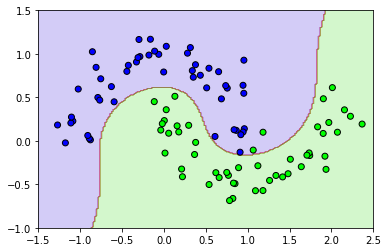

In [44]:
plot_decision_boundary(polynomial_svm_clf, x_range=(-1.5, 2.5), y_range=(-1, 1.5))
plt.show()

In [34]:
X

array([[ 2.19190754e+00,  4.02245648e-01],
       [ 3.27037122e-01,  1.23120473e-01],
       [-8.92049977e-01, -2.25531460e-01],
       [ 8.82680282e-01,  7.04318392e-01],
       [-8.12838424e-02,  9.52612198e-01],
       [ 1.03849162e+00, -6.40986425e-01],
       [-8.76925987e-01,  5.31684233e-02],
       [ 2.37764700e-01, -2.55766818e-02],
       [-6.59426868e-01,  5.09699678e-01],
       [ 7.48334584e-03,  9.51987028e-01],
       [ 3.12732286e-01, -1.85789013e-01],
       [ 1.05254607e+00, -6.15700800e-01],
       [-7.87762869e-01,  3.84063536e-01],
       [ 1.58960293e-01,  8.25030967e-01],
       [ 2.28520939e-01,  1.10047337e+00],
       [ 1.53389461e+00,  3.70203790e-02],
       [ 1.20453155e+00, -4.11440888e-01],
       [-7.31896303e-02,  8.36914534e-01],
       [ 1.94704718e+00,  2.74856484e-01],
       [ 6.78356128e-01,  7.51575137e-01],
       [-8.25454940e-01,  8.93587758e-02],
       [ 2.03866034e+00, -1.76325275e-01],
       [ 2.16582579e-02,  5.60546498e-01],
       [ 3.